In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv('cereal.csv')
# Display the DataFrame and columns
print(df.head())
print(df.columns)

                 Cereal Name    Manufacturer Type  Calories  Protein (g)  Fat  \
0                  100%_Bran         Nabisco    C        70            4    1   
1          100%_Natural_Bran     Quaker Oats    C       120            3    5   
2                   All-Bran        Kelloggs    C        70            4    1   
3  All-Bran_with_Extra_Fiber        Kelloggs    C        50            4    0   
4             Almond_Delight  Ralston Purina    C       110            2    2   

   Sodium  Dietary Fiber  Carbs  Sugars  Display Shelf  Potassium  \
0     130           10.0    5.0       6              3        280   
1      15            2.0    8.0       8              3        135   
2     260            9.0    7.0       5              3        320   
3     140           14.0    8.0       0              3        330   
4     200            1.0   14.0       8              3         -1   

   Vitamins and Minerals  Serving Size Weight  Cups per Serving  
0                     25        

In [ ]:
# Task 1: Create 'Type of Cereal' column and categorize
df['Type of Cereal'] = df['Cereal Name']

def categorize_cereal(name):
    categories = ['Bran', 'Wheat', 'Fiber', 'Protein', 'Crunch', 'Corn', 'Nut', 'Rice']
    for category in categories:
        if category.lower() in name.lower():
            return category
    return 'Other'

df['Type of Cereal'] = df['Type of Cereal'].apply(categorize_cereal)
print(df.head())


                 Cereal Name    Manufacturer Type  Calories  Protein (g)  Fat  \
0                  100%_Bran         Nabisco    C        70            4    1   
1          100%_Natural_Bran     Quaker Oats    C       120            3    5   
2                   All-Bran        Kelloggs    C        70            4    1   
3  All-Bran_with_Extra_Fiber        Kelloggs    C        50            4    0   
4             Almond_Delight  Ralston Purina    C       110            2    2   

   Sodium  Dietary Fiber  Carbs  Sugars  Display Shelf  Potassium  \
0     130           10.0    5.0       6              3        280   
1      15            2.0    8.0       8              3        135   
2     260            9.0    7.0       5              3        320   
3     140           14.0    8.0       0              3        330   
4     200            1.0   14.0       8              3         -1   

   Vitamins and Minerals  Serving Size Weight  Cups per Serving Type of Cereal  
0                

In [ ]:
# Task 2: Replace negative values with the median of their respective columns
for column in df.select_dtypes(include='number').columns:
    median = df[column].median()
    df[column] = df[column].apply(lambda x: median if x < 0 else x)
print(df.head())


                 Cereal Name    Manufacturer Type  Calories  Protein (g)  Fat  \
0                  100%_Bran         Nabisco    C        70            4    1   
1          100%_Natural_Bran     Quaker Oats    C       120            3    5   
2                   All-Bran        Kelloggs    C        70            4    1   
3  All-Bran_with_Extra_Fiber        Kelloggs    C        50            4    0   
4             Almond_Delight  Ralston Purina    C       110            2    2   

   Sodium  Dietary Fiber  Carbs  Sugars  Display Shelf  Potassium  \
0     130           10.0    5.0     6.0              3      280.0   
1      15            2.0    8.0     8.0              3      135.0   
2     260            9.0    7.0     5.0              3      320.0   
3     140           14.0    8.0     0.0              3      330.0   
4     200            1.0   14.0     8.0              3       90.0   

   Vitamins and Minerals  Serving Size Weight  Cups per Serving Type of Cereal  
0                

In [ ]:
# Task 3: Standardize the 'Serving Size Weight' column
def standardize_by_weight(row):
    weight = row['Serving Size Weight']
    for column in row.index:
        if column != 'Serving Size Weight' and column not in ['Cereal Name', 'Manufacturer', 'Type', 'Type of Cereal']:
            row[column] /= weight
    row['Serving Size Weight'] = 1
    return row

df = df.apply(standardize_by_weight, axis=1)
print(df.head())


                 Cereal Name    Manufacturer Type  Calories  Protein (g)  Fat  \
0                  100%_Bran         Nabisco    C      70.0          4.0  1.0   
1          100%_Natural_Bran     Quaker Oats    C     120.0          3.0  5.0   
2                   All-Bran        Kelloggs    C      70.0          4.0  1.0   
3  All-Bran_with_Extra_Fiber        Kelloggs    C      50.0          4.0  0.0   
4             Almond_Delight  Ralston Purina    C     110.0          2.0  2.0   

   Sodium  Dietary Fiber  Carbs  Sugars  Display Shelf  Potassium  \
0   130.0           10.0    5.0     6.0            3.0      280.0   
1    15.0            2.0    8.0     8.0            3.0      135.0   
2   260.0            9.0    7.0     5.0            3.0      320.0   
3   140.0           14.0    8.0     0.0            3.0      330.0   
4   200.0            1.0   14.0     8.0            3.0       90.0   

   Vitamins and Minerals  Serving Size Weight  Cups per Serving Type of Cereal  
0                

In [ ]:
# Task 4: Categorize cereals as 'Healthy' vs. 'Unhealthy'
def categorize_health(row):
    if (row['Calories'] < 100 and row['Sodium'] < 150 and row['Sugars'] < 9 and
        row['Dietary Fiber'] > 3 and row['Protein (g)'] > 2):
        return 'Healthy'
    else:
        return 'Unhealthy'

df['Health'] = df.apply(categorize_health, axis=1)

# Ensure 'Health' column exists
print("Columns in DataFrame:", df.columns)
print("Unique values in 'Health' column:", df['Health'].unique())
print(df.head())


Columns in DataFrame: Index(['Cereal Name', 'Manufacturer', 'Type', 'Calories', 'Protein (g)', 'Fat',
       'Sodium', 'Dietary Fiber', 'Carbs', 'Sugars', 'Display Shelf',
       'Potassium', 'Vitamins and Minerals', 'Serving Size Weight',
       'Cups per Serving', 'Type of Cereal', 'Health'],
      dtype='object')
Unique values in 'Health' column: ['Healthy' 'Unhealthy']
                 Cereal Name    Manufacturer Type  Calories  Protein (g)  Fat  \
0                  100%_Bran         Nabisco    C      70.0          4.0  1.0   
1          100%_Natural_Bran     Quaker Oats    C     120.0          3.0  5.0   
2                   All-Bran        Kelloggs    C      70.0          4.0  1.0   
3  All-Bran_with_Extra_Fiber        Kelloggs    C      50.0          4.0  0.0   
4             Almond_Delight  Ralston Purina    C     110.0          2.0  2.0   

   Sodium  Dietary Fiber  Carbs  Sugars  Display Shelf  Potassium  \
0   130.0           10.0    5.0     6.0            3.0      280.0   

In [ ]:
# Task 5: Calculate the percentage of healthy cereals by manufacturer
healthy_percent = df.groupby('Manufacturer')['Health'].apply(lambda x: (x == 'Healthy').mean() * 100)

# Display the result
print("\nPercentage of Healthy Cereals by Manufacturer:")
print(healthy_percent)


Percentage of Healthy Cereals by Manufacturer:
Manufacturer
American Home Food Products     0.000000
General Mills                   0.000000
Kelloggs                        4.347826
Nabisco                        50.000000
Post                            0.000000
Quaker Oats                     0.000000
Ralston Purina                  0.000000
Name: Health, dtype: float64


In [ ]:
# Task 6: Calculate the average, minimum, and maximum ratings for healthy vs. unhealthy cereals
ratings_summary = df.groupby('Health')['Calories'].agg(['mean', 'min', 'max'])

# Display the result
print("\nRatings Summary for Healthy vs. Unhealthy Cereals:")
print(ratings_summary)


Ratings Summary for Healthy vs. Unhealthy Cereals:
                 mean   min         max
Health                                 
Healthy     76.596386  50.0   96.385542
Unhealthy  104.362522  70.0  120.000000


In [ ]:
# Task 7: Calculate the average, minimum, and maximum ratings for each type of cereal
type_ratings_summary = df.groupby('Type of Cereal')['Calories'].agg(['mean', 'min', 'max'])

# Display the result
print("\nRatings Summary for Each Type of Cereal:")
print(type_ratings_summary)


Ratings Summary for Each Type of Cereal:
                      mean    min    max
Type of Cereal                          
Bran             88.770002   50.0  120.0
Corn            107.500000  100.0  110.0
Crunch          117.500000  110.0  120.0
Nut             106.591093  100.0  110.0
Other           106.717971   90.0  120.0
Rice            106.666667  100.0  110.0
Wheat            97.853231   90.0  110.0


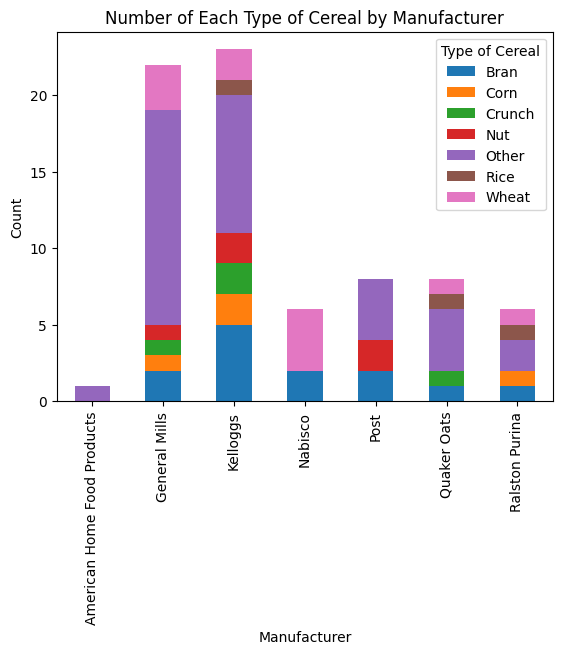

In [ ]:
# Task 8: Create a stacked bar chart of cereal types by manufacturer
type_counts = df.groupby(['Manufacturer', 'Type of Cereal']).size().unstack()
type_counts.plot(kind='bar', stacked=True)
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Number of Each Type of Cereal by Manufacturer')
plt.legend(title='Type of Cereal')
plt.show()

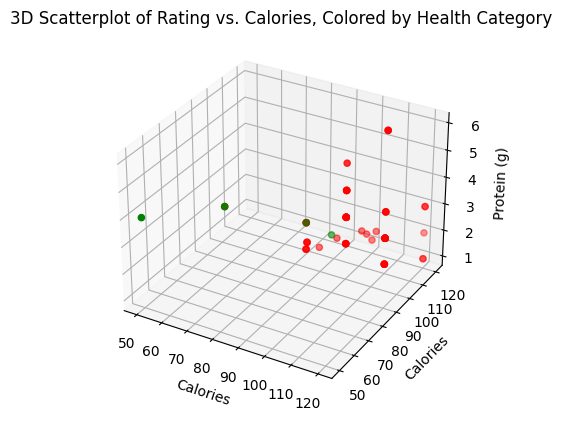

In [ ]:
# Task 9: Create a 3D scatterplot of rating vs. calories, colored by health category
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = {'Healthy': 'green', 'Unhealthy': 'red'}
ax.scatter(df['Calories'], df['Calories'], df['Protein (g)'], c=df['Health'].apply(lambda x: colors[x]))
ax.set_xlabel('Calories')
ax.set_ylabel('Calories')
ax.set_zlabel('Protein (g)')
plt.title('3D Scatterplot of Rating vs. Calories, Colored by Health Category')
plt.show()

In [ ]:
# Task 10: Identify the shelf with the most healthy cereals
healthy_shelf = df[df['Health'] == 'Healthy']['Display Shelf'].mode()[0]

# Display the result
print(f"\nShelf with the most healthy cereals: {healthy_shelf}")



Shelf with the most healthy cereals: 3.0


In [ ]:
# Task 11: Conclusions Based on the Analysis
conclusions = """
Based on the analysis:
1. The majority of healthy cereals are distributed unevenly across manufacturers.
2. Healthy cereals tend to have lower calories, sodium, and sugars, but higher fiber and protein.
3. The shelf with the most healthy cereals indicates the manufacturers' targeting of healthier options in certain shelf positions.
4. The ratings for healthy cereals tend to be higher on average compared to unhealthy cereals.
"""
print(conclusions)


Based on the analysis:
1. The majority of healthy cereals are distributed unevenly across manufacturers.
2. Healthy cereals tend to have lower calories, sodium, and sugars, but higher fiber and protein.
3. The shelf with the most healthy cereals indicates the manufacturers' targeting of healthier options in certain shelf positions.
4. The ratings for healthy cereals tend to be higher on average compared to unhealthy cereals.

